<center><h1> Sorting Algorithms Visualizer.</h1></center>
<center><h3>Made Using Matplotlib Animation.</h3></center>
<ceter><img src='https://miro.medium.com/max/1400/0*qwkWXc-wzW2D8ggV.jpg'></center>

### Sorting Algorithms 
* Quick Sort
* Merge Sort
* Insertion Sort
* Selection Sort
* Bubble Sort

# Importing Libraries to be used.

In [1]:
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation

In [2]:
sns.set_style('darkgrid')

### Helper function to swap elements i and j of list.

In [12]:
def swap(A, i, j):
    """Helper function to swap elements i and j of list."""

    if i != j:
        A[i], A[j] = A[j], A[i]

# Bubble Sort Algorithm

In [4]:
def bubblesort(A):
    """In-place bubble sort."""

    if len(A) == 1:
        return

    swapped = True
    for i in range(len(A) - 1):
        if not swapped:
            break
        swapped = False
        for j in range(len(A) - 1 - i):
            if A[j] > A[j + 1]:
                swap(A, j, j + 1)
                swapped = True
            yield A

# Insertion sort Algorithm

In [5]:
def insertionsort(A):
    """In-place insertion sort."""

    for i in range(1, len(A)):
        j = i
        while j > 0 and A[j] < A[j - 1]:
            swap(A, j, j - 1)
            j -= 1
            yield A

# Merge sort Algorithm

In [6]:

def mergesort(A, start, end):
    """Merge sort."""

    if end <= start:
        return

    mid = start + ((end - start + 1) // 2) - 1
    yield from mergesort(A, start, mid)
    yield from mergesort(A, mid + 1, end)
    yield from merge(A, start, mid, end)
    yield A

# Algorithm to merge sublists

In [7]:
def merge(A, start, mid, end):
    """Helper function for merge sort."""
    
    merged = []
    leftIdx = start
    rightIdx = mid + 1

    while leftIdx <= mid and rightIdx <= end:
        if A[leftIdx] < A[rightIdx]:
            merged.append(A[leftIdx])
            leftIdx += 1
        else:
            merged.append(A[rightIdx])
            rightIdx += 1

    while leftIdx <= mid:
        merged.append(A[leftIdx])
        leftIdx += 1

    while rightIdx <= end:
        merged.append(A[rightIdx])
        rightIdx += 1

    for i, sorted_val in enumerate(merged):
        A[start + i] = sorted_val
        yield A

# Quick Sort Algorithm

In [8]:

def quicksort(A, start, end):
    """In-place quicksort."""

    if start >= end:
        return

    pivot = A[end]
    pivotIdx = start

    for i in range(start, end):
        if A[i] < pivot:
            swap(A, i, pivotIdx)
            pivotIdx += 1
        yield A
    swap(A, end, pivotIdx)
    yield A

    yield from quicksort(A, start, pivotIdx - 1)
    yield from quicksort(A, pivotIdx + 1, end)

# Selection Sort Algorithm

In [9]:
def selectionsort(A):
    """In-place selection sort."""
    if len(A) == 1:
        return

    for i in range(len(A)):
        # Find minimum unsorted value.
        minVal = A[i]
        minIdx = i
        for j in range(i, len(A)):
            if A[j] < minVal:
                minVal = A[j]
                minIdx = j
            yield A
        swap(A, i, minIdx)
        yield A

# Function to give a new color each time

In [10]:
def colors(N):
        if N%5==0:
            colors='skyblue'
        elif N%5==1:
            colors='green'
        elif N%5==2:
            colors='orange'
        elif N%5==3:
            colors='red'
        elif N%5==4:
            colors='pink'
        return colors

# Main function for Image Animation and plotting

Enter number of integers:  12
Enter sorting method:
(b)ubble
(i)nsertion
(m)erge         
(q)uick
(s)election
 b


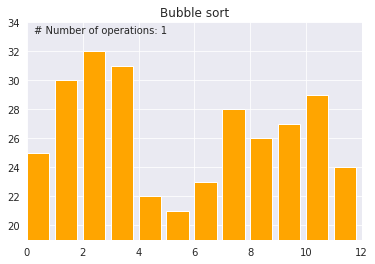

In [11]:

if __name__ == "__main__":
   
    # Get user input to determine range of integers (1 to N) and desired
    
    # sorting method (algorithm).
    
    N = int(input("Enter number of integers: "))
    #A=list(map(int,input("Enter the Integers :").split()))
    method_msg = "Enter sorting method:\n(b)ubble\n(i)nsertion\n(m)erge \
        \n(q)uick\n(s)election\n"
    method = input(method_msg)

    # Build and randomly shuffle list of integers.
    
    A = [x + 1 for x in range(20,N+20)]
    random.seed(time.time())
    random.shuffle(A)
    yl1=min(A)
    yl2=max(A)

    # Get appropriate generator to supply to matplotlib FuncAnimation method.
    
    if method == "b":
        title = "Bubble sort"
        generator = bubblesort(A)
    elif method == "i":
        title = "Insertion sort"
        generator = insertionsort(A)
    elif method == "m":
        title = "Merge sort"
        generator = mergesort(A, 0, N - 1)
    elif method == "q":
        title = "Quick sort"
        generator = quicksort(A, 0, N - 1)
    else:
        title = "Selection sort"
        generator = selectionsort(A)
    
    fig, ax = plt.subplots()
    ax.set_title(title)

    # Initializing a bar plot.
    
    bar_rects = ax.bar(range(len(A)), A, align="edge",color=colors(N))

    # Set axis limits. Set y axis upper limit high enough that the tops of
    # the bars won't overlap with the text label.
    
    ax.set_xlim(0,N)
    ax.set_ylim(max(yl1-2,0),yl2+2)

    # Place a text label in the upper-left corner of the plot to display
    # number of operations performed. 
    
    text = ax.text(0.02, 0.95, "", transform=ax.transAxes)

    # Define function update_fig() for use with matplotlib.pyplot.FuncAnimation().
    # To track the number of operations, i.e., iterations
    
    iteration = [0]
    def update_fig(A, rects, iteration):
        for rect, val in zip(rects, A):
            rect.set_height(val)
        iteration[0] += 1
        text.set_text("# Number of operations: {}".format(iteration[0]))

    anim = animation.FuncAnimation(fig, func=update_fig,
        fargs=(bar_rects, iteration), frames=generator, interval=2,
        repeat=False)
    plt.show()


<center><h1> Below is a Example.</h1></center>

<center><img src='https://i.ibb.co/LQbCvgN/ezgif-com-crop.gif' width="700"></center>